In [8]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from joblib import dump, load
import matplotlib.pyplot as plt
pd.options.display.max_rows = 200
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [9]:
def predict_classes(resized, cc_clf):
    im = resized.reshape((1,-1))
    type_image = cc_clf.predict(im)[0]
    return type_image

In [10]:
def predict_quality(resized, qc_clf):
    im = resized.reshape((1,-1))
    type_image = qc_clf.predict(im)[0]
    return type_image

In [11]:
def predict_cancer(resized, qc_clf, cc_clf):
    im = resized.reshape((1,-1))
    temp_type = qc_clf.predict(im)[0]
    if temp_type  == '2':
        type_image = cc_clf.predict(im)[0]
    else:
        type_image = temp_type
    return type_image

In [184]:
qc_clf = load('models/qc.joblib') 
cc_clf = load('models/cc.joblib') 

In [14]:
result = pd.DataFrame(columns = ['filename','true', 'pred'])
classes = os.listdir('data/test_data')
for i in classes:
    filenames = os.listdir('data/test_data/'+ i)
    for file in filenames:
        img = cv2.imread('data/test_data/'+ i + '/'+ file, cv2.IMREAD_GRAYSCALE)
        width = 256
        height = 256
        dim = (width, height)
        # resize image
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        resized = resized/255 
        temp_result = pd.DataFrame([list(['','',''])],columns = ['filename','true', 'pred'])
        temp_result['filename'][0] = file
        #print(file)
        temp_result['true'][0] = i
        #print(i)
        temp_result['pred'][0] = predict_cancer(resized, qc_clf, cc_clf)
        result = result.append(temp_result)
        del temp_result

In [15]:
np.mean(result['pred']==result['true'])

0.7358490566037735

In [16]:
print(result)

         filename true pred
0    test_1_0.bmp    1    1
0    test_1_1.bmp    1    1
0   test_1_10.bmp    1    1
0   test_1_11.bmp    1    1
0   test_1_12.bmp    1    1
0   test_1_14.bmp    1    1
0   test_1_15.bmp    1    1
0   test_1_17.bmp    1    1
0   test_1_18.bmp    1    1
0   test_1_19.bmp    1    1
0    test_1_2.bmp    1    1
0    test_1_3.bmp    1    1
0    test_1_4.bmp    1    1
0    test_1_5.bmp    1    1
0    test_1_6.bmp    1    1
0    test_1_7.bmp    1    1
0    test_1_8.bmp    1    1
0    test_1_9.bmp    1    1
0   train_1_0.bmp    1    1
0   train_1_1.jpg    1    1
0  train_1_10.bmp    1    1
0  train_1_11.bmp    1    1
0  train_1_12.bmp    1    1
0  train_1_13.bmp    1    1
0  train_1_14.bmp    1    1
0  train_1_15.bmp    1    1
0  train_1_17.bmp    1    1
0  train_1_18.bmp    1    1
0   train_1_2.bmp    1    1
0  train_1_20.bmp    1    1
0  train_1_21.bmp    1    1
0  train_1_22.bmp    1    1
0  train_1_23.bmp    1    1
0  train_1_24.bmp    1    1
0  train_1_25.bmp   

In [20]:
y_pred = label_binarize(result['pred'], classes=['1','2','4','6'])
y_true = label_binarize(result['true'], classes=['1','2','4','6'])

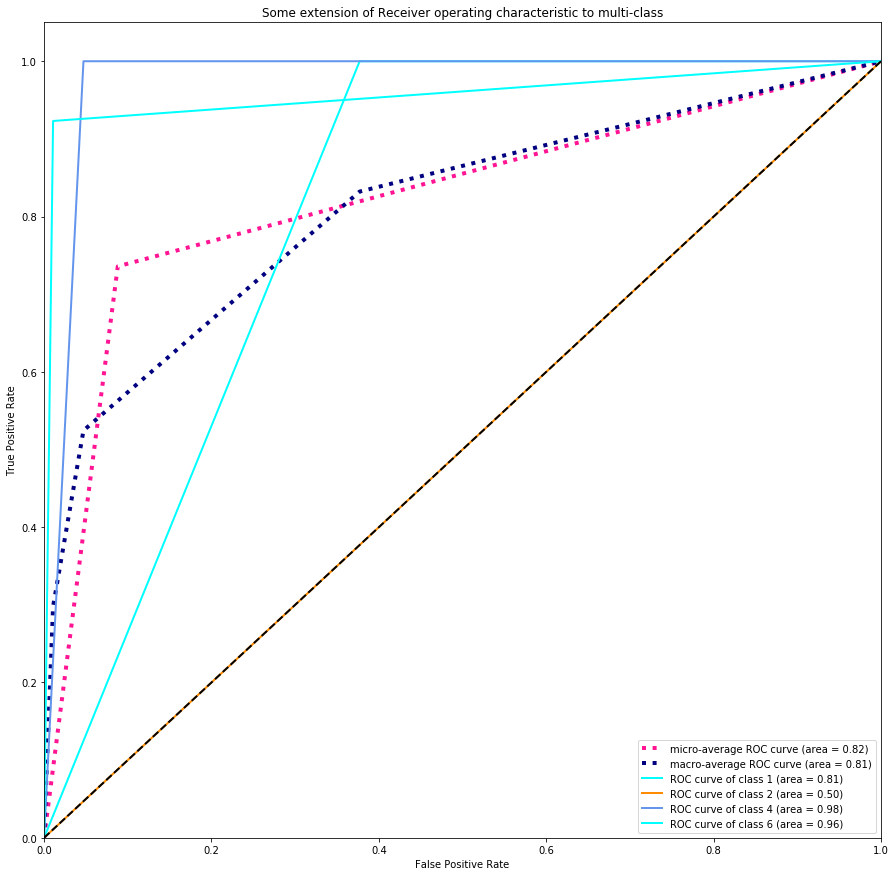

In [42]:
classes=['1','2','4','6']
n_classes = 4
lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (15,15))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.savefig('train_plots/alg_auc_roc.jpg')
plt.show()

In [12]:
def predict_cancer_alg(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    width = 256
    height = 256
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized = resized/255 
    qc_clf = load('models/qc.joblib') 
    cc_clf = load('models/cc.joblib') 
    return predict_cancer(resized, qc_clf, cc_clf)

'4'

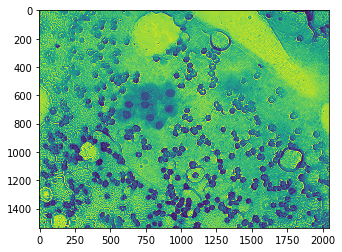

In [19]:
filename = 'data/test_data/4/train_4_8.jpg'
plt.imshow(cv2.imread(filename, cv2.IMREAD_GRAYSCALE))
predict_cancer_alg(filename)